<a href="https://colab.research.google.com/github/Sirmuchai/Data-Visualisation-with-ggplot2-using-R/blob/main/Data_Visualisation_with_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Visualisation with ggplot2 using R

### Dataset Overview
* This data set contains booking information for a city hotel and a resort hotel. It includes
information such as when customers made the booking, length of stay, the number of adults,
children, or babies, and the number of available parking spaces, among other things.
* We have removed personally identifying information from the dataset.
* **Dataset Download Link**: https://bit.ly/2WvQbhJ
* NB: You need to download this file.


## 1. Defining the Question

### a) Specifying the Data Analysis Question
Provide strategy recommendations that will lead to revenue growth.

### b) Defining the Metric for Success
The solutions to the following questions will help us answer our research question:

* When is the best time of year to book a hotel room?
* When is the optimal length of stay in order to get the best daily rate?
* How will you know if a hotel was likely to receive a disproportionately high number of special requests?

### c) Understanding the context
The dataset provided contains information on the various chain of hotels, including when customers made, the booking, length of stay, the number of adults, children, or babies, and the number of available parking spaces, among other things.
Using that data, we are supposed to offer a startegy for the hotel on revenue growth

### d) Recording the Experimental Design
By analysing data for the below questions, better strategy recommendations will be provided:

* How many bookings were canceled?
* What was the booking ratio between resort hotels and city hotels?
* What was the percentage of booking for each year?
* Which was the busiest month for hotels?
* Most guests came from which country?
* How long do most people stay in hotels?
* Which was the most booked accommodation type (Single, Couple, Family)?

### e) Data Relevance
How relevant was the provided data?


### 1. Pre requisite

In [1]:
# Let's install tidyverse packages in Rstudio
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### 2. Reading the Data
To work with a dataset, we need to import it and understand its structure.

In [4]:
# Load the data below
# --- 
# Dataset url = save in google drive
hotel_bookings = "https://drive.google.com/uc?id=1Mv9qzz6o4umVFAhWs6AvJC1bMfJe9jN9&export=download"

# --- 
# YOUR CODE GOES BELOW

hotel_booking_df <- read.csv(hotel_bookings)
head(hotel_booking_df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [5]:

# Checking the first 5 rows of data
# ---
# YOUR CODE GOES BELOW
# 
head(hotel_booking_df, 5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


In [6]:
# Checking the last 5 rows of data
# ---
# YOUR CODE GOES BELOW
# 

tail(hotel_booking_df, 5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
119386,City Hotel,0,23,2017,August,35,30,2,5,2,⋯,No Deposit,394,NULL,0,Transient,96.14,0,0,Check-Out,2017-09-06
119387,City Hotel,0,102,2017,August,35,31,2,5,3,⋯,No Deposit,9,NULL,0,Transient,225.43,0,2,Check-Out,2017-09-07
119388,City Hotel,0,34,2017,August,35,31,2,5,2,⋯,No Deposit,9,NULL,0,Transient,157.71,0,4,Check-Out,2017-09-07
119389,City Hotel,0,109,2017,August,35,31,2,5,2,⋯,No Deposit,89,NULL,0,Transient,104.40,0,0,Check-Out,2017-09-07
119390,City Hotel,0,205,2017,August,35,29,2,7,2,⋯,No Deposit,9,NULL,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [14]:
# Sample 10 rows of data
# ---
# YOUR CODE GOES BELOW
# 

sample(hotel_booking_df,10)

adr,deposit_type,arrival_date_week_number,company,required_car_parking_spaces,reserved_room_type,stays_in_weekend_nights,hotel,assigned_room_type,distribution_channel
<dbl>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
0.00,No Deposit,27,NULL,0,C,0,Resort Hotel,C,Direct
0.00,No Deposit,27,NULL,0,C,0,Resort Hotel,C,Direct
75.00,No Deposit,27,NULL,0,A,0,Resort Hotel,C,Direct
75.00,No Deposit,27,NULL,0,A,0,Resort Hotel,A,Corporate
98.00,No Deposit,27,NULL,0,A,0,Resort Hotel,A,TA/TO
98.00,No Deposit,27,NULL,0,A,0,Resort Hotel,A,TA/TO
107.00,No Deposit,27,NULL,0,C,0,Resort Hotel,C,Direct
103.00,No Deposit,27,NULL,0,C,0,Resort Hotel,C,Direct
82.00,No Deposit,27,NULL,0,A,0,Resort Hotel,A,TA/TO


In [15]:
# Checking number of rows and columns
# ---
# YOUR CODE GOES BELOW
#  
dim(hotel_booking_df)

[1] 119390     32

In [16]:
# Checking datatypes
# ---
# YOUR CODE GOES BELOW
# 
glimpse(hotel_booking_df)

Rows: 119,390
Columns: 32
$ hotel                          <chr> "Resort Hotel", "Resort Hotel", "Resort…
$ is_canceled                    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, …
$ lead_time                      <int> 342, 737, 7, 13, 14, 14, 0, 9, 85, 75, …
$ arrival_date_year              <int> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ arrival_date_month             <chr> "July", "July", "July", "July", "July",…
$ arrival_date_week_number       <int> 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,…
$ arrival_date_day_of_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ stays_in_weekend_nights        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ stays_in_week_nights           <int> 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, …
$ adults                         <int> 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ children                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ babies                         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ meal        

**Observations:**

* There are NULL information  is agent and company
* There were 119,390 booking

### 3. External Data Source Validation


## 4. Data Preparation
### Performing Data Cleaning

In [17]:
# Checking datatypes and missing entries of all the variables
# ---
# YOUR CODE GOES BELOW
# 
colSums(is.na(hotel_booking_df))

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             4                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                              0 
                       company           days_in_waiting_list 
                             0                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0

**Observation**
* There are 4 missing data whose children is missing values

In [19]:
#Checking how many duplicate rows are there in the data
# ---
# YOUR CODE GOES BELOW
# 

hotel_booking_df[duplicated(hotel_booking_df), ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
23,Resort Hotel,0,72,2015,July,27,1,2,4,2,⋯,No Deposit,250,NULL,0,Transient,84.67,0,1,Check-Out,2015-07-07
44,Resort Hotel,0,70,2015,July,27,2,2,3,2,⋯,No Deposit,250,NULL,0,Transient,137.00,0,1,Check-Out,2015-07-07
139,Resort Hotel,1,5,2015,July,28,5,1,0,2,⋯,No Deposit,240,NULL,0,Transient,97.00,0,0,Canceled,2015-07-01
201,Resort Hotel,0,0,2015,July,28,7,0,1,1,⋯,No Deposit,240,NULL,0,Transient,109.80,0,3,Check-Out,2015-07-08
220,Resort Hotel,1,1,2015,July,28,8,0,1,2,⋯,No Deposit,NULL,110,0,Transient,104.72,0,1,Canceled,2015-07-08
257,Resort Hotel,0,91,2015,July,28,10,0,2,2,⋯,No Deposit,240,NULL,0,Transient,73.80,0,1,Check-Out,2015-07-12
262,Resort Hotel,0,30,2015,July,28,10,2,2,2,⋯,No Deposit,NULL,NULL,0,Transient-Party,197.00,0,1,Check-Out,2015-07-14
354,Resort Hotel,0,98,2015,July,29,13,1,1,2,⋯,No Deposit,240,NULL,0,Transient-Party,82.00,0,3,Check-Out,2015-07-15


In [20]:
# Checking if any of the columns are all null
# ---
# YOUR CODE GOES BELOW
# 

colSums(is.na(hotel_booking_df))

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             4                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                              0 
                       company           days_in_waiting_list 
                             0                              0 
                 customer_type                            adr 
                             0                              0 
   required_car_parking_spaces      total_of_special_requests 
                             0                              0 
            reservation_status        reservation_status_date 
                             0                              0

* The column children has missing values, 4 of them

In [21]:
# Checking if any of the rows are all null
# ---
# YOUR CODE GOES BELOW
# 

hotel_booking_df[!complete.cases(hotel_booking_df),]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
40601,City Hotel,1,2,2015,August,32,3,1,0,2,⋯,No Deposit,NULL,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40668,City Hotel,1,1,2015,August,32,5,0,2,2,⋯,No Deposit,14,NULL,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40680,City Hotel,1,1,2015,August,32,5,0,2,3,⋯,No Deposit,NULL,NULL,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41161,City Hotel,1,8,2015,August,33,13,2,5,2,⋯,No Deposit,9,NULL,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


* we have 4 rows with null information under children

In [22]:
# Checking the correlation of the features through the use of 
# visualizations the correlation using heatmap

# Let's first install and import the reshape2 package that will provide 
# the melt() function for creating a correlation matrix. 
# After running the following line, once prompted in the console,
# type `Yes` to install it.
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [23]:
# loading the package
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [24]:
head(hotel_booking_df)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,2015-07-03


## Question: Create a heatmap to determine which variables are highly correlated.


In [25]:
# Select the desired columns
hote_booking_df2 <- hotel_booking_df %>%
  na.omit() %>%
  select(adults, children, babies, required_car_parking_spaces)
hote_booking_df2

,adults,children,babies,required_car_parking_spaces
,<int>,<int>,<int>,<int>
1,2,0,0,0
2,2,0,0,0
3,1,0,0,0
4,1,0,0,0
5,2,0,0,0
6,2,0,0,0
7,2,0,0,0
8,2,0,0,0
9,2,0,0,0


In [26]:
# Create a correlation matrix
corr_matrix <- cor(hote_booking_df2, method="s")
head(corr_matrix)

,adults,children,babies,required_car_parking_spaces
adults,1.00000000,0.07210130,0.02766992,0.01791815
children,0.07210130,1.00000000,0.03926751,0.06097735
babies,0.02766992,0.03926751,1.00000000,0.04057557
required_car_parking_spaces,0.01791815,0.06097735,0.04057557,1.00000000


In [27]:
# Create a table with long form
corr_df <- melt(corr_matrix)
head(corr_df)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,adults,adults,1.00000000
2,children,adults,0.07210130
3,babies,adults,0.02766992
4,required_car_parking_spaces,adults,0.01791815
5,adults,children,0.07210130
6,children,children,1.00000000


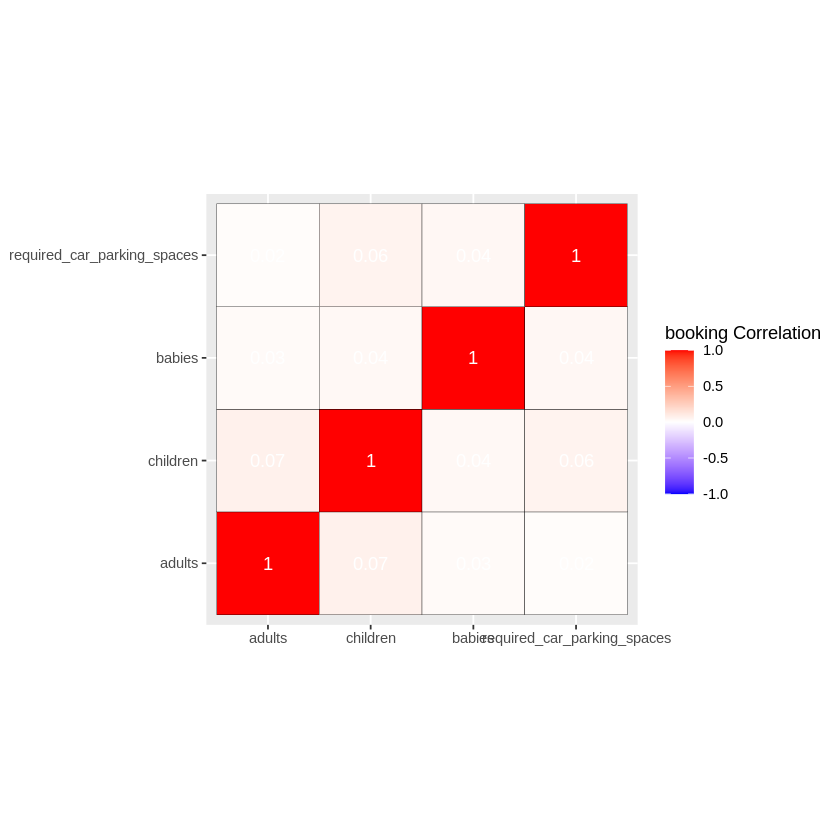

In [28]:
# Plot the heatmap
ggplot(corr_df, aes(Var1, Var2, fill = value)) + 
  geom_tile(color = "black") + 
  geom_text(
    aes(label = round(value, 2)), 
    color = "white"
  ) +
  coord_fixed() + 
  labs(
    fill="booking Correlation"
  ) +
  scale_fill_gradient2(
    low = "blue", 
    high = "red",
    mid = "white", 
    limit = c(-1,1)
  ) + 
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
  )

* Children were related to adults most while parking were least related

In [29]:
# Dropping company column because it has alot of missing values 
# and we won't need to answer any of our questions
# ---
# YOUR CODE GOES BELOW
#

hotel_booking_df = select(hotel_booking_df, -c("company"))
head(hotel_booking_df)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,0,342,2015,July,27,1,0,0,2,⋯,3,No Deposit,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,737,2015,July,27,1,0,0,2,⋯,4,No Deposit,NULL,0,Transient,0,0,0,Check-Out,2015-07-01
3,Resort Hotel,0,7,2015,July,27,1,0,1,1,⋯,0,No Deposit,NULL,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,13,2015,July,27,1,0,1,1,⋯,0,No Deposit,304,0,Transient,75,0,0,Check-Out,2015-07-02
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,14,2015,July,27,1,0,2,2,⋯,0,No Deposit,240,0,Transient,98,0,1,Check-Out,2015-07-03


From the data variable description we see that the Distribution Channel category that tells us about Booking distribution.

* The term “TA” means “Travel Agents”
* The term “TO” means “Tour Operators”
* This allows us to fill the missing values in the agents column with TO

In [31]:
# We drop rows where there is no adult, baby and child as 
# these records won't help us.
# ---
# YOUR GOES BELOW
# get a new data set comprising of sum of adult, baby and child

total <- c( hotel_booking_df$adults + hotel_booking_df$children+hotel_booking_df$babies)

# filter out the records where there we no adults, baby or child

hotel_booking_clean_df<-subset(hotel_booking_df, total!= 0)
dim(hotel_booking_clean_df)
dim(hotel_booking_df)

[1] 119206     31

[1] 119390     31

In [32]:
# We replace missing children values with rounded mean value
# ---
# Hint i.e. use round()
# ---
# YOUR GOES BELOW
#



hotel_booking_clean_df$children[is.na(hotel_booking_clean_df$children)] <- mean(hotel_booking_clean_df$children, na.rm = TRUE)


In [33]:
# Checking for missing values in the dataframe
# ---
# YOUR GOES BELOW
#
colSums(is.na(hotel_booking_clean_df))

hotel                    is_canceled 
                             0                              0 
                     lead_time              arrival_date_year 
                             0                              0 
            arrival_date_month       arrival_date_week_number 
                             0                              0 
     arrival_date_day_of_month        stays_in_weekend_nights 
                             0                              0 
          stays_in_week_nights                         adults 
                             0                              0 
                      children                         babies 
                             0                              0 
                          meal                        country 
                             0                              0 
                market_segment           distribution_channel 
                             0                              0 
             is_repeated_guest         previous_cancellations 
                             0                              0 
previous_bookings_not_canceled             reserved_room_type 
                             0                              0 
            assigned_room_type                booking_changes 
                             0                              0 
                  deposit_type                          agent 
                             0                              0 
          days_in_waiting_list                  customer_type 
                             0                              0 
                           adr    required_car_parking_spaces 
                             0                              0 
     total_of_special_requests             reservation_status 
                             0                              0 
       reservation_status_date 
                             0

In [34]:
# Converting the datatypes of the following columns from float to integer
# i.e. children, company, agent
# ---
# YOUR GOES BELOW
#
hotel_booking_clean_df$children <- as.integer(hotel_booking_clean_df$children)
hotel_booking_clean_df$agent <- as.integer(hotel_booking_clean_df$agent)


glimpse( hotel_booking_clean_df)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Rows: 119,206
Columns: 31
$ hotel                          <chr> "Resort Hotel", "Resort Hotel", "Resort…
$ is_canceled                    <int> 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, …
$ lead_time                      <int> 342, 737, 7, 13, 14, 14, 0, 9, 85, 75, …
$ arrival_date_year              <int> 2015, 2015, 2015, 2015, 2015, 2015, 201…
$ arrival_date_month             <chr> "July", "July", "July", "July", "July",…
$ arrival_date_week_number       <int> 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,…
$ arrival_date_day_of_month      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ stays_in_weekend_nights        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ stays_in_week_nights           <int> 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, …
$ adults                         <int> 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ children                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ babies                         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ meal        

## 5. Solution Implementation


### 5.a) Questions

In [35]:
# 1. How many bookings were cancelled?
# ---
# Visualisation: Barplot


#hotel_booking_clean_df %>% 
 # group_by(hotel) %>%
  #summarize(canceled_booking = sum(is_canceled))
cancelation_ratio_df <- hotel_booking_clean_df %>% 
   group_by(hotel) %>%
  summarise(n = n()) %>%
  mutate(is_canceled = (n/sum(n))*100)

cancelation_ratio_df

hotel,n,is_canceled
<chr>,<int>,<dbl>
City Hotel,79159,66.40521
Resort Hotel,40047,33.59479


Warning message in geom_col(stat = "identity", width = 0.5, fill = "#0099f9"):
“Ignoring unknown parameters: `stat`”


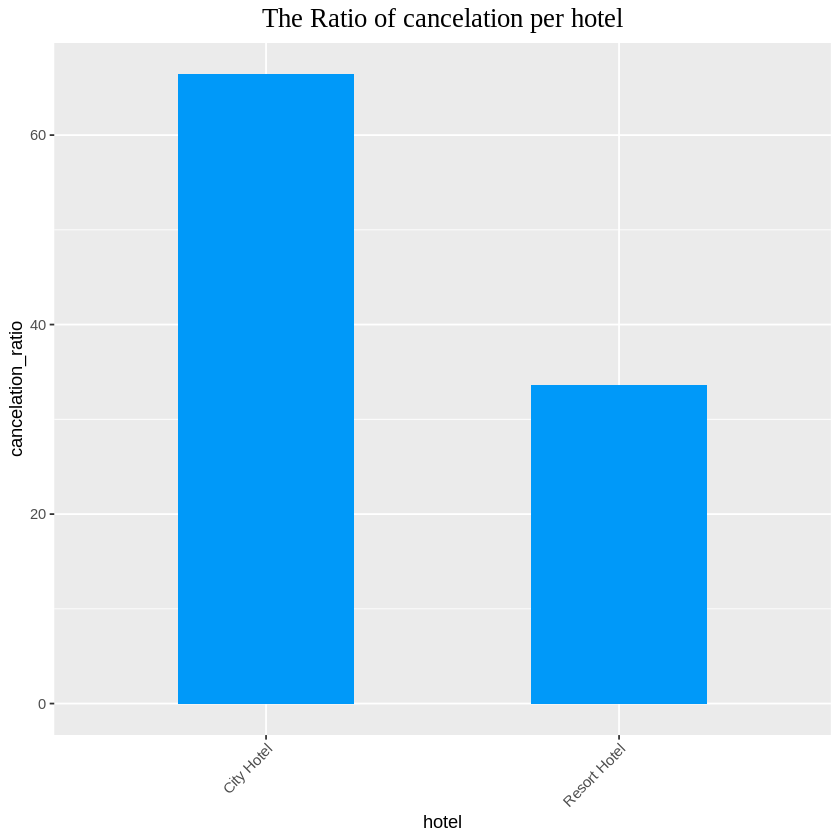

In [36]:
# Plotting the chart
ggplot(cancelation_ratio_df, aes(x = hotel, y = is_canceled)) +
  geom_col(
    stat="identity", width=0.5, fill = "#0099f9"
  ) +
  labs(
    title = "The Ratio of cancelation per hotel", 
    x = "hotel", 
    y = "cancelation_ratio"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size=16, family="Times New Roman"), 
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

In [39]:
# 2. What was the booking ratio between resort hotel and city hotel?
# ---
# Barplot of booking ratio between resort hotel and city hotel

booking_ratio_df <- hotel_booking_clean_df %>% 
   group_by(hotel) %>%
  summarise(n = n()) %>%
  mutate(booking_ratio = n/sum(n))

dim(booking_ratio_df)
 

[1] 2 3

Warning message in geom_col(stat = "identity", width = 0.5, fill = "#0099f9"):
“Ignoring unknown parameters: `stat`”


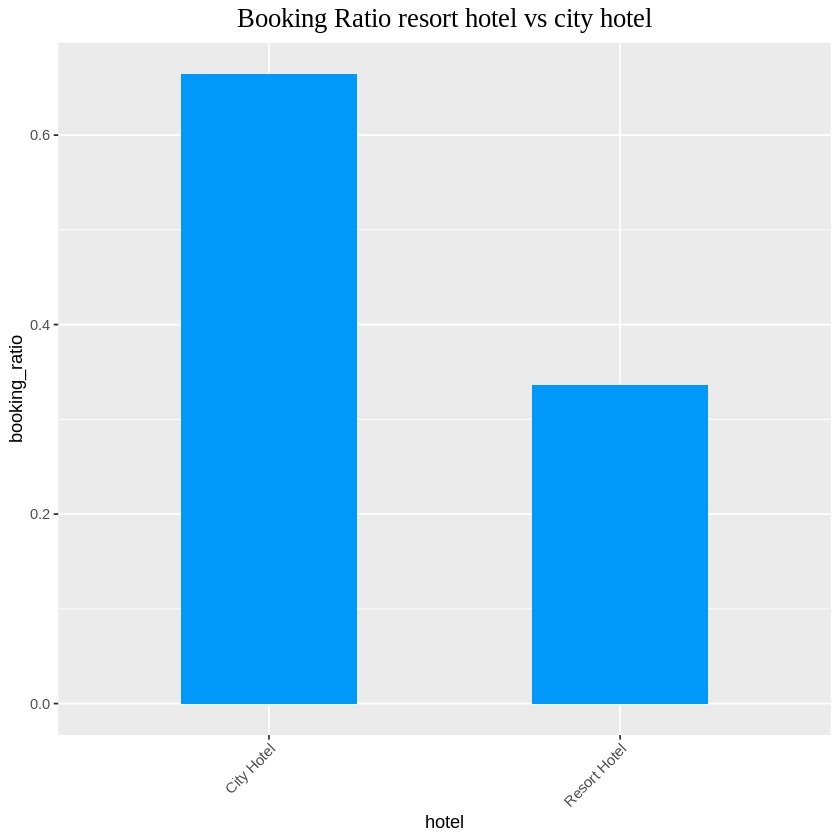

In [40]:
# Plotting the chart
ggplot(booking_ratio_df, aes(x = hotel, y = booking_ratio)) +
  geom_col(
    stat="identity", width=0.5, fill = "#0099f9"
  ) +
  labs(
    title = "Booking Ratio resort hotel vs city hotel", 
    x = "hotel", 
    y = "booking_ratio"
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size=16, family="Times New Roman"), 
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

In [41]:
# 3. What was the percentage of booking for each year?
# ---

yearly_booking_df <- hotel_booking_clean_df %>% 
   group_by(arrival_date_year) %>%
  summarise(n = n()) %>%
  mutate(percent_yearly_booking = (n/sum(n))*100)

yearly_booking_df

yearly_booking_df$arrival_date_year <- as.character(yearly_booking_df$arrival_date_year)

yearly_booking_df

arrival_date_year,n,percent_yearly_booking
<int>,<int>,<dbl>
2015,21963,18.42441
2016,56623,47.50013
2017,40620,34.07547


arrival_date_year,n,percent_yearly_booking
<chr>,<int>,<dbl>
2015,21963,18.42441
2016,56623,47.50013
2017,40620,34.07547


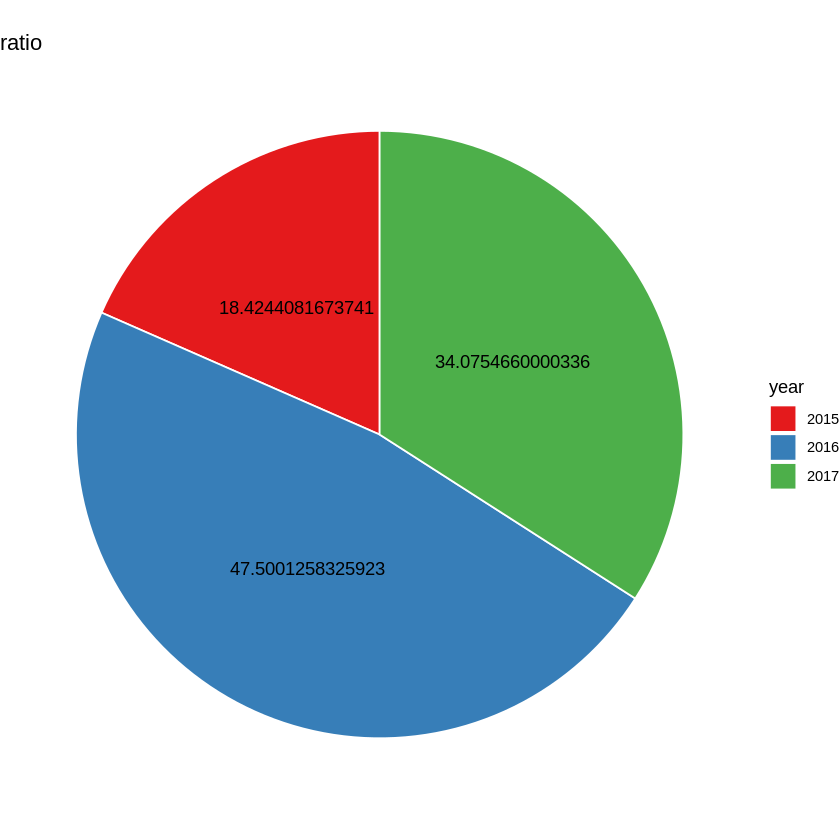

In [42]:
# represent the data on a pie chart
ggplot(data=yearly_booking_df, aes(x="", y=percent_yearly_booking, fill=arrival_date_year)) +
  geom_bar(
    stat="identity", width=0.5, color = "white"
  ) +
  coord_polar("y") + 
  geom_text(
    aes(label = paste0(percent_yearly_booking)), position = position_stack(vjust = 0.5)
  ) +
  scale_fill_brewer(palette="Set1") +   
  labs(
    fill = "year", 
    title = "ratio"
  ) +
  theme_void()

In [43]:
# 4. Which were the most busiest months for hotels?
# ---
# 

monthly_df <- hotel_booking_clean_df %>% 
   group_by(arrival_date_month) %>%
  summarise(n = n()) %>%
  mutate(booking_ratio = n/sum(n)*100)

monthly_sort_df<-monthly_df[order(-monthly_df$booking_ratio),]

monthly_sort_df

arrival_date_month,n,booking_ratio
<chr>,<int>,<dbl>
August,13857,11.624415
July,12644,10.606849
May,11780,9.882053
October,11147,9.351039
April,11078,9.293156
June,10929,9.168163
September,10500,8.808281
March,9768,8.194218
February,8052,6.754694


In [44]:
# 5. From which top 3 countries did most guests come from?
# --- 
# YOUR GOES BELOW
#
#summarize number of guests per country
countries_df <- hotel_booking_clean_df %>%
  group_by(country) %>%
  summarize(guests = sum(adults, children, babies))
#sort the countries guests in desceding order 
most_guests_per_country <- countries_df[order(-countries_df$guests),]

In [45]:
#select the 3 countries with the highest number of guests

head(most_guests_per_country, 3)

country,guests
<chr>,<int>
PRT,90027
GBR,24568
FRA,21579


In [46]:
# 6.a) How long do most people stay in hotels?
#   b) By city and resort? Separate the data by hotel

weekend_df <- hotel_booking_clean_df %>%
  group_by(hotel) %>%
  summarize(avg_guest_weekend = mean(stays_in_weekend_nights))
     #                  
week_df <- hotel_booking_clean_df %>%
  group_by(hotel) %>%
  summarize(avy_guest_week = mean(stays_in_week_nights))
duration_df <- merge(week_df,weekend_df,by="hotel")
duration_df

hotel,avy_guest_week,avg_guest_weekend
<chr>,<dbl>,<dbl>
City Hotel,2.180813,0.7941232
Resort Hotel,3.128549,1.1898270


### 5.b) Recommendations
From the above analysis, below are our recommendations:
1. on the month of July and August , the number of visitor is optimal and thus the hotel need to use this time to maximase profif.
2. on months like December when we expect visitor to hike, due to amny holidays, the data shows that the occupancy is usually very low, this is an area where the hotel need to capitalize by offering affordable offers.
3. city hotels have a higher booking compared to resort hotel. However, the average duration of stay is higher is resort than city hotel, in this, the hotel management need to make city hotels expensive than resort hotels since thay are for short term.


## 6. Challenging your Solution
In this step, we review our solution and implement approaches that could potentially provide a better outcome. In our case, we could propose the following question that wasn't answered in our solution because it couldn't have greatly contributed to our recommendation.


In [47]:
# When should hotels provide special offers?
# offers should be when booking is at its lowest:-
monthly_df <- hotel_booking_clean_df %>% 
   group_by(arrival_date_month) %>%
  summarise(n = n()) %>%
  mutate(booking_ratio = n/sum(n)*100)

monthly_sort_df<-monthly_df[order(monthly_df$booking_ratio),]

monthly_sort_df

arrival_date_month,n,booking_ratio
<chr>,<int>,<dbl>
January,5921,4.967032
December,6759,5.670017
November,6771,5.680083
February,8052,6.754694
March,9768,8.194218
September,10500,8.808281
June,10929,9.168163
April,11078,9.293156
October,11147,9.351039


**Our observations:**
* Bookings are lowest in November, December, January and February

* The higher the bookings, the more the profit, so, by encouranging more bookings, the hotel will gain higher profit

##7. Follow up questions
During this step, you rethink and propose other ways that you can improve your solution.

a. Did we have the right data? yes

b. Do we need other data to answer our question? yes, the room type was not clear.

c. Did we have the right question? yes